In [1]:
# path_ = r'C:\Users\Itay\Documents\ipcaLocal\Centroid Figures for Jialin Paper'
path_='.'

In [67]:
import mpl_toolkits.mplot3d as a3
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.linalg as sp
import math
import os
import glob 
import torch as th
from random import choices
import tqdm
import pickle
# save path 
save_path = path_
num_chkpoints = 2043

t_jialin = np.array([    0,     1,    63,   125,   187,   249,   251,   313,   375,
      437,   499,   501,   563,   625,   687,   749,   751,   813,
      875,   937,   999,  1001,  1063,  1125,  1187,  1249,  1500,
     1750,  2000,  2250,  2500,  2750,  3000,  3250,  3500,  3750,
     4000,  4250,  4500,  4750,  5000,  5250,  5500,  5750,  6000,
     6250,  6500,  7250,  8250,  9250, 10250, 11250, 12250, 13250,
    14250, 15250, 16250, 19000, 22750, 26500, 30250, 34000, 37750,
    41500, 45250, 49000, 50000])
t_save = set(list(np.arange(1000))+list(t_jialin) + list(np.arange(15000,35000,20)))
t_save = list(t_save)
t_save.sort()
 
jialin_ind = [np.where(t_save==k)[0][0] for k in t_jialin]

label_m=['AM',
 'GM',
 'HM',
 'Sqrt AM',
 'Bhattacharyya',
 "Jeffrey's"]

# training data

In [68]:
xp =pickle.load(open('/home/ubuntu/ext_vol/inpca/notebooks/data/inpca_coord.p', 'rb'))

In [69]:
import pandas as pd
xp = pd.DataFrame(xp, columns=[f'x{i}' for i in range(9)])

In [70]:
xp['Centroid'] = 'original'
for m in range(6):
    xp.loc[2010+67*m:2010+67*(m+1), 'Centroid'] = label_m[m]

In [71]:
xp['style'] = '1'

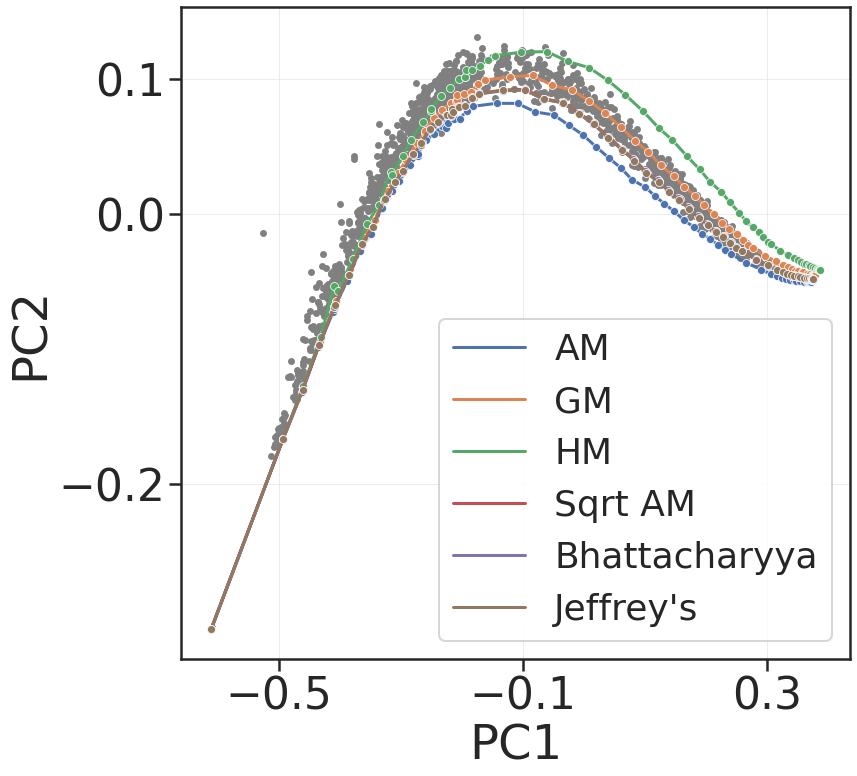

In [72]:
f, ax=plt.subplots(figsize=(12,12))
import seaborn as sns
sns.set(context='poster',
        style='ticks',
        font_scale=2,
        rc={'axes.grid': True,
            'grid.color': '.9',
#             'lines.linewidth': 0.5,
            'grid.linewidth': 0.75})
sns.lineplot(data=xp.iloc[2010:-1], x='x0',y='x1', hue='Centroid',ax=ax, marker='.',  markersize=16)
sns.scatterplot(data=xp.iloc[:2010], x='x0',y='x1', color='grey', ax=ax, s=48, linewidth=0)
ax.set(xlabel='PC1', ylabel='PC2',xticks=[-0.5,-0.1,0.3], yticks=[-0.2, 0, 0.1])
plt.legend(fontsize=36)

In [73]:
f.savefig('training_err_averaging_traj.pdf', bbox_inches='tight')

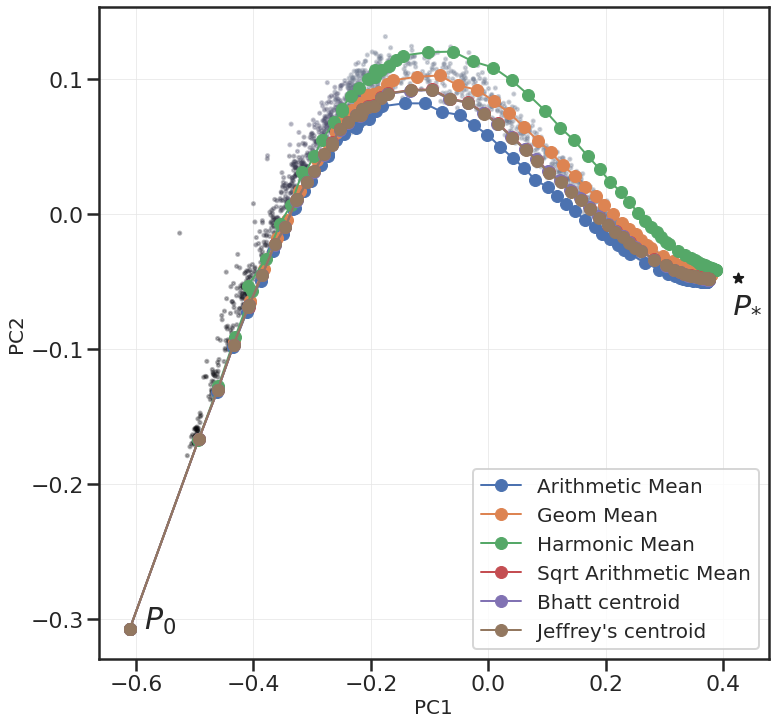

In [7]:
fig = plt.figure(figsize=(12,12))
import seaborn as sns
sns.set(context='poster',
        style='ticks',
        font_scale=1,
        rc={'axes.grid': True,
            'grid.color': '.9',
#             'lines.linewidth': 0.5,
            'grid.linewidth': 0.75})
plt.scatter(xp[:2010,0],xp[:2010,1],s=10,c=np.array(jialin_ind*30)/max(jialin_ind),cmap = 'bone', alpha = 0.3)
#label_m = [r'arithmetic mean',r'geom mean',r'harmonic mean',r'sqrt arithmetic mean',r' bhatt centroid ',r' Jeffrey centroid ']
for m in range(6):
    plt.plot(xp[2010+67*m:2010+67*(m+1),0],xp[2010+67*m:2010+67*(m+1),1],'o-',linewidth=2, label=label_m[m])
plt.text(xp[-1,0]-0.01,xp[-1,1]-0.025,r'$P_{*}$',fontsize=30)
plt.scatter(xp[-1,0],xp[-1,1],c='k',marker= '*',s=100)

plt.text(xp[0,0]+0.025,xp[0,1],r'$P_{0}$',fontsize=30)

plt.legend(fontsize=20)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)

#plt.tight_layout()
plt.savefig('training_err_averaging_traj.pdf', dpi=300)


# test data 

In [7]:
xp_test =pickle.load(open(os.path.join(save_path,'inpca_coord_test.p'), 'rb'))

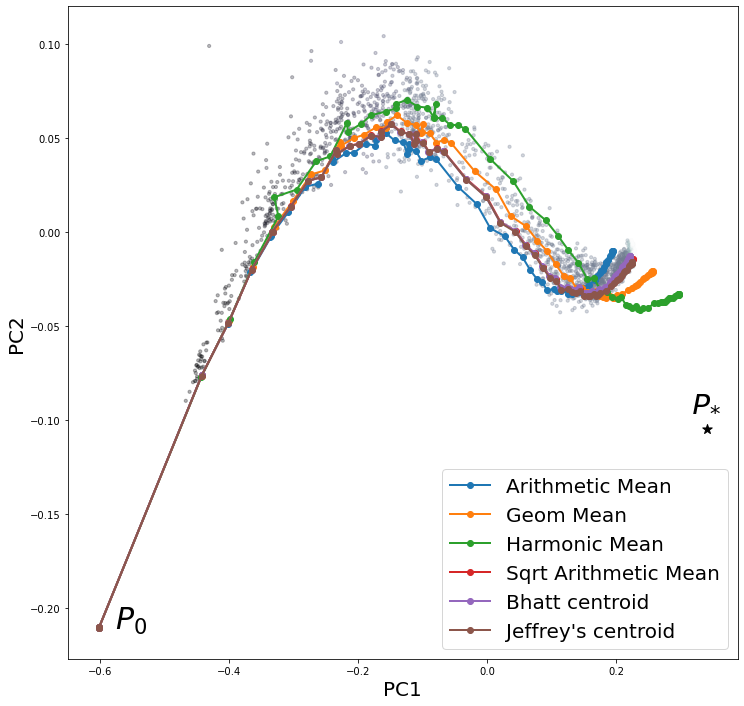

In [8]:
fig = plt.figure(figsize=(12,12))
plt.scatter(xp_test[:2010,0],xp_test[:2010,1],s=10,c=np.array(jialin_ind*30)/max(jialin_ind),cmap = 'bone', alpha = 0.3)
for m in range(6):
    plt.plot(xp_test[2010+67*m:2010+67*(m+1),0],xp_test[2010+67*m:2010+67*(m+1),1],'o-',linewidth=2, label=label_m[m])
plt.scatter(xp_test[-1,0],xp_test[-1,1],c='k',marker= '*',s=100)
plt.text(xp_test[-1,0]-0.025,xp_test[-1,1]+0.01,r'$P_{*}$',fontsize=30)
plt.text(xp_test[0,0]+0.025,xp_test[0,1],r'$P_{0}$',fontsize=30)

plt.axis('tight')
plt.legend(fontsize=20)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.savefig('validation_err_averaging_traj.pdf', dpi=300)

In [10]:
progress_err_ds= pickle.load(open(os.path.join(save_path,'progress_err_ds.p'), 'rb'))

In [12]:

progress_AM = progress_err_ds['progress_AM'] 
validation_err_AM = progress_err_ds['validation_err_AM'] 

progress_GM =progress_err_ds['progress_GM']
validation_err_GM =progress_err_ds['validation_err_GM'] 

progress_HM =progress_err_ds['progress_HM']
validation_err_HM =progress_err_ds['validation_err_HM']

progress_sqrtAM = progress_err_ds['progress_sqrtAM']
validation_err_sqrtAM  = progress_err_ds['validation_err_sqrtAM']

progress_bhatt = progress_err_ds['progress_Bhatt']
validation_err_bhatt = progress_err_ds['validation_err_Bhatt']

progress_skl = progress_err_ds['progress_sKL']
validation_err_skl =progress_err_ds['validation_err_sKL'] 




In [16]:
progress_err_ds= pickle.load(open(os.path.join('/home/ubuntu/ext_vol/inpca/notebooks/data/','progress_err_ds.p'), 'rb'))

In [26]:
r = pd.DataFrame(np.vstack([t.squeeze() for t in progress_err_ds.values()]).T, columns=list(progress_err_ds.keys()))

In [27]:
r

,progress_AM,validation_err_AM,progress_GM,validation_err_GM,progress_HM,validation_err_HM,progress_sqrtAM,validation_err_sqrtAM,progress_Bhatt,validation_err_Bhatt,progress_sKL,validation_err_sKL
0,0.000229,0.100004,0.000226,0.100004,0.000224,0.100004,0.000228,0.100004,0.000229,0.100004,0.000228,0.100004
1,0.000788,0.100343,0.000776,0.100337,0.000764,0.100332,0.000782,0.100340,0.000783,0.100340,0.000782,0.100340
2,0.136214,0.211195,0.136518,0.212166,0.136207,0.212520,0.136447,0.211757,0.136404,0.211709,0.136363,0.211690
3,0.171370,0.245576,0.173759,0.249113,0.175476,0.251860,0.172672,0.247446,0.172615,0.247342,0.172560,0.247370
4,0.203992,0.278126,0.207748,0.283749,0.210325,0.288245,0.205984,0.281031,0.205843,0.280792,0.205870,0.280980
...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.714587,0.750199,0.759317,0.790508,0.783636,0.810165,0.737976,0.771766,0.735501,0.768300,0.737617,0.772745
63,0.714939,0.750441,0.759801,0.790836,0.784196,0.810588,0.738401,0.772055,0.735923,0.768582,0.738042,0.773046
64,0.715103,0.750438,0.759947,0.790858,0.784141,0.810410,0.738560,0.772068,0.736078,0.768585,0.738200,0.773065
65,0.715328,0.750583,0.760244,0.791071,0.784384,0.810571,0.738824,0.772254,0.736335,0.768755,0.738465,0.773253


In [43]:
for n in ['AM', 'GM', 'HM', 'sqrtAM', 'Bhatt', 'sKL']:
    r[f'validation_err_{n}'] = 1 - r[f'validation_err_{n}']

[Text(0.5, 0, 'Progress'),
 Text(0, 0.5, 'Test Error'),

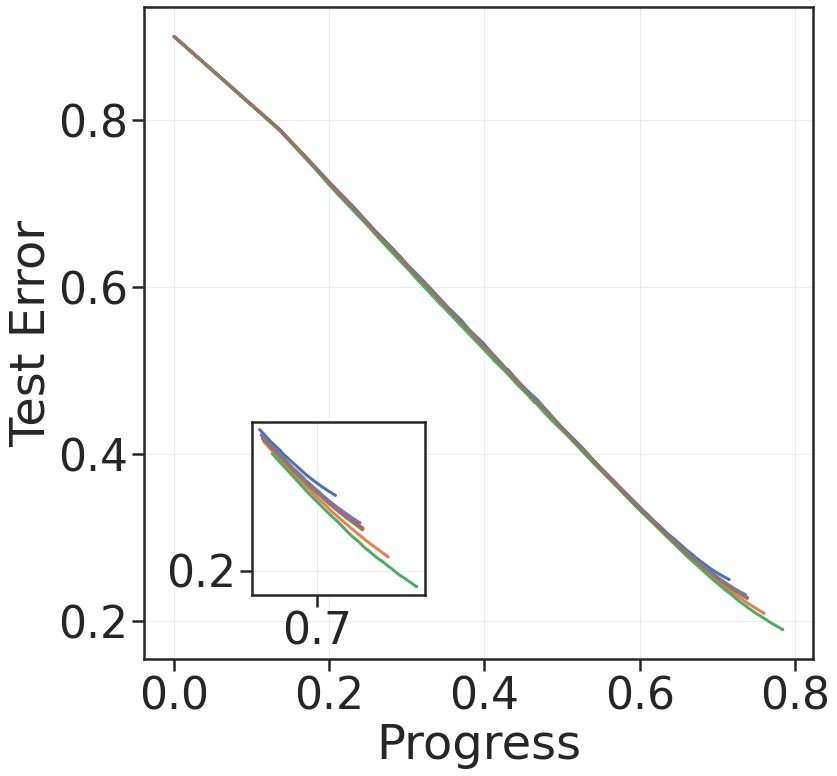

In [65]:
f, ax=plt.subplots(figsize=(12,12))
import seaborn as sns
sns.set(context='poster',
        style='ticks',
        font_scale=2,
        rc={'axes.grid': True,
            'grid.color': '.9',
#             'lines.linewidth': 0.5,
            'grid.linewidth': 0.75})
ax2 = f.add_axes([0.25, 0.2, 0.2, 0.2])
for n in ['AM', 'GM', 'HM', 'sqrtAM', 'Bhatt', 'sKL']:
    sns.lineplot(data=r, x=f'progress_{n}', y=f'validation_err_{n}', ax=ax)
    sns.lineplot(data=r[r[f'progress_{n}'] >= 0.65], x=f'progress_{n}', y=f'validation_err_{n}', ax=ax2)
ax2.set(xlabel='', ylabel='', xticks=[.7], yticks=[.2])
ax.set(xlabel='Progress', ylabel='Test Error', xticks=[0,0.2, 0.4, 0.6,0.8], yticks=[0.2, 0.4, 0.6,0.8])

In [66]:
f.savefig('/home/ubuntu/ext_vol/6217ef20ae4596301f213f84/fig/progress_vs_validation_err_averaging.pdf', bbox_inches='tight')

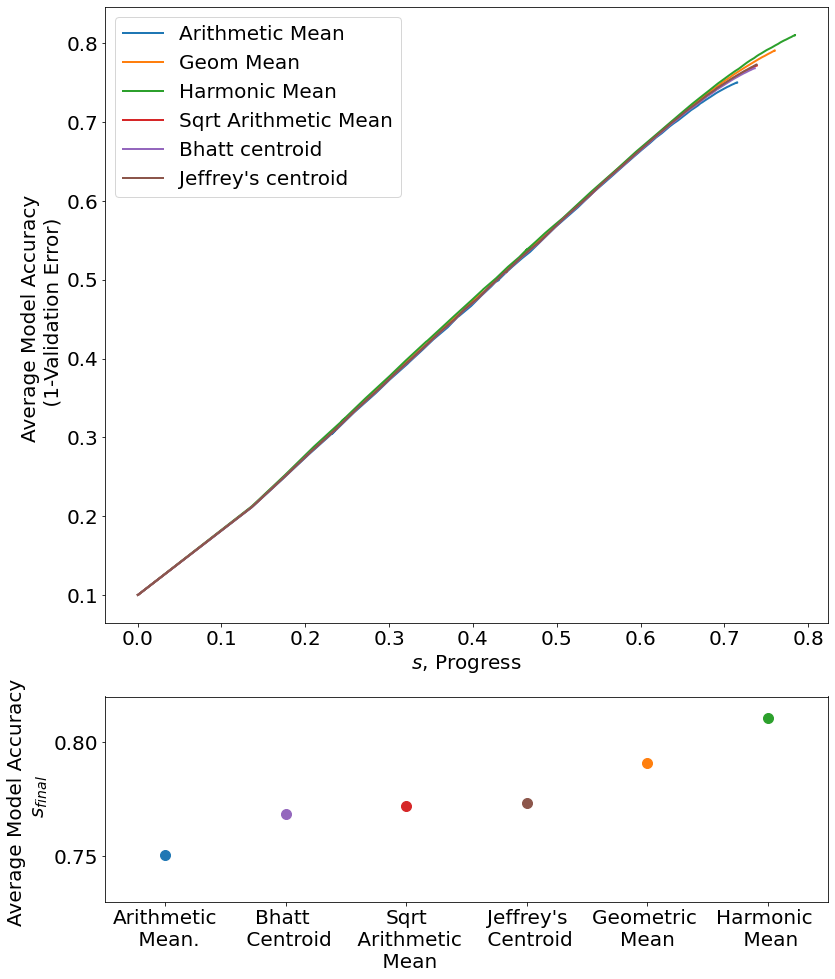

In [14]:
import matplotlib
font = {
        'size'   : 20}

matplotlib.rc('font', **font)
label_m = [r'Arithmetic Mean',r'Geom Mean',r'Harmonic Mean',r'Sqrt Arithmetic Mean',r'Bhatt centroid ',"Jeffrey's centroid"]
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},figsize=(12,14))

a0.plot(progress_AM,validation_err_AM,label = label_m[0],linewidth=2)
a0.plot(progress_GM,validation_err_GM,label = label_m[1],linewidth=2)

a0.plot(progress_HM,validation_err_HM,label = label_m[2],linewidth=2)
a0.plot(progress_sqrtAM,validation_err_sqrtAM,label = label_m[3],linewidth=2)
a0.plot(progress_bhatt,validation_err_bhatt,label = label_m[4],linewidth=2)
a0.plot(progress_skl,validation_err_skl,label = label_m[5],linewidth=2)
a0.legend()
a0.set_ylabel('Average Model Accuracy \n (1-Validation Error)')
a0.set_xlabel('$s$, Progress')
#plt.savefig('progress_vs_validation_err_averaging.pdf', dpi=300)

a1.scatter(0,validation_err_AM[-1],s=100)
a1.scatter(4,validation_err_GM[-1],s=100 )
a1.scatter(5,validation_err_HM[-1],s=100)
a1.scatter(2,validation_err_sqrtAM[-1] ,s=100)
a1.scatter(1,validation_err_bhatt[-1],s=100)
a1.scatter(3,validation_err_skl[-1] ,s=100)


a1.set_xticks([0,1,2,3,4,5],['Arithmetic\n Mean.','Bhatt \n Centroid','Sqrt\n Arithmetic\n Mean','Jeffrey\'s\n Centroid','Geometric \nMean','Harmonic \n Mean'])
a1.set_yticks([0.75,0.80])
a1.axis([-0.5,5.5,0.73,0.82])
a1.set_ylabel('Average Model Accuracy \n $s_{final}$')
#plt.xlabel('Type of Averaging')
f.tight_layout()
f.savefig('progress_vs_validation_err_averaging.pdf', dpi=300)
